Import Libraries

In [8]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import torch

Set device

In [9]:
# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cuda


Read Images

In [10]:
images = os.listdir('flickr30k_images/')

sample_size = len(images)
dt = np.array([None] * sample_size)
real_images = np.array([None] * sample_size)
j=0
for i in images:
    real_images[j] = np.array(plt.imread('flickr30k_images/' + i))
    dt[j] = np.array(plt.imread('flickr30k_images/' + i))
    j += 1

Resize Images

In [11]:
size = (256, 256)
num_channels = 3
j = 0
for i in dt:
    dt[j] = cv2.resize(i, size)
    dt[j] = dt[j].reshape(1, size[0], size[1], num_channels)
    j += 1

dt = np.vstack(dt[:])
imgs = torch.tensor(dt)

Show Image Sample

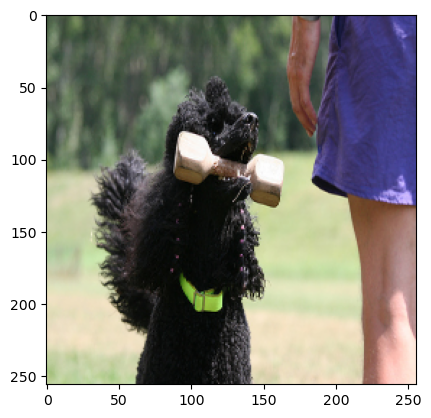

In [14]:
plt.imshow(np.squeeze(dt[0]))
plt.show()

Load GIT-large model

In [15]:
from transformers import AutoProcessor, AutoModelForCausalLM
processor = AutoProcessor.from_pretrained("microsoft/git-large-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-large-coco")

Process images

In [16]:
dataloader = {'predict': torch.utils.data.DataLoader(imgs, batch_size = 1, shuffle=False, num_workers=4)}

for inputs in dataloader['predict']:
    pixel_values = processor(images=inputs, return_tensors="pt").pixel_values.to(device)
    model = model.to(device)
    generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
    generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)
    print(generated_caption)

['a black dog playing with a toy in a field.']
['a group of young women are jumping in a dance studio.']
['a little girl sitting in front of a rainbow']
['a woman reading a book in a restaurant.']
['people sunbathing on a rock near the ocean.']
['two people walking through a garden']
['a person standing on a platform at night.']
['a man sitting in a bus looking out the window.']
['a man is working on a window ledge.']
['a man is sleeping on a table with a bunch of chairs.']
['a street artist painting a street scene in paris.']
['a man riding a bike on a brick road.']
['a woman is shaving a sheep on a tarp.']
['a young man sitting in a chair holding a piece of paper.']
['two dogs are running in the grass.']
['the mountains are covered in snow.']
['a man and woman preparing a salad in a kitchen.']
['a woman in a suit walking through a city square.']
['a young boy is sliding down a bouncy house.']
['a woman holding a rainbow colored umbrella in a park.']
['a man sitting on a bench reading